In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
x = pd.read_csv('ex2Data linear regression/ex2x.dat', header=None).values
y = pd.read_csv('ex2Data linear regression/ex2y.dat', header=None).values

In [18]:
# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

print(f"Mean of x: {x_mean}")
print(f"Mean of y: {y_mean}")


Mean of x: 4.9235719719999995
Mean of y: 1.0646860546


In [19]:
# Calculate the slope (m) and intercept (b)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
m = numerator / denominator
b = y_mean - m * x_mean

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")


Slope (m): 0.06388116582583418
Intercept (b): 0.7501625370012387


In [20]:
# Make predictions
y_pred = m * x + b

# Display first few predictions
print("Predicted y:", y_pred)


Predicted y: [0.88213301 0.90145925 0.91242024 0.9125536  0.91300068 0.92817943
 0.93616421 0.94408193 0.94913126 0.95191452 0.96273315 0.96603721
 0.96813789 0.9687372  0.97576355 0.98264528 0.98481427 1.00093739
 1.00887261 1.02155112 1.02766265 1.03013153 1.03271278 1.04467032
 1.049645   1.06814594 1.07186788 1.07394126 1.09615246 1.09764812
 1.09871866 1.10597078 1.10799754 1.11350339 1.11566247 1.12411594
 1.14608539 1.15587783 1.16409354 1.18061805 1.18862808 1.19875772
 1.20232859 1.20700379 1.22712502 1.2354925  1.24486287 1.24670868
 1.25012538 1.25678078]


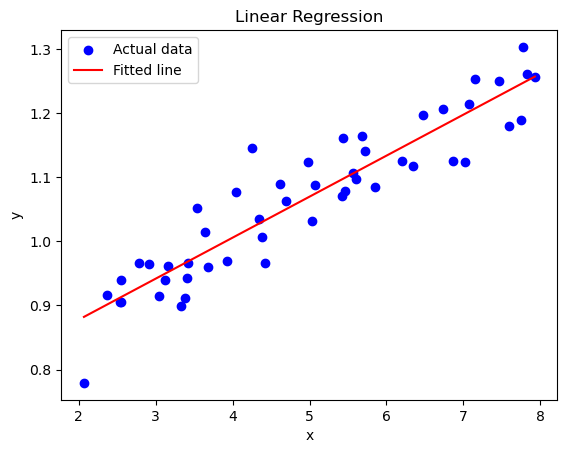

In [21]:
# Plot the data and the linear regression line
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


In [22]:
def compute_cost(x, y, m, b):
    """
    Compute the cost function for linear regression.
    
    Parameters:
    x (array-like): Feature data
    y (array-like): Target data
    m (float): Slope of the regression line
    b (float): Intercept of the regression line
    
    Returns:
    float: Cost function value
    """
    # Number of data points
    n = len(y)
    
    # Predictions
    y_pred = m * x + b
    
    # Compute the cost (Mean Squared Error)
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    
    return cost


In [23]:
# Calculate the cost using the computed m and b
cost = compute_cost(x, y, m, b)

print(f"Cost (Mean Squared Error): {cost}")


Cost (Mean Squared Error): 0.0009870699732761254


In [24]:
# Initialize parameters
m = 0  # Initial slope
b = 0  # Initial intercept
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations


In [25]:
def gradient_descent(x, y, m, b, learning_rate, num_iterations):
    """
    Perform gradient descent to learn m and b.
    
    Parameters:
    x (array-like): Feature data
    y (array-like): Target data
    m (float): Initial slope
    b (float): Initial intercept
    learning_rate (float): Learning rate
    num_iterations (int): Number of iterations
    
    Returns:
    tuple: (final_m, final_b, cost_history) where
           final_m (float): Learned slope
           final_b (float): Learned intercept
           cost_history (list): List of cost values over iterations
    """
    n = len(y)
    cost_history = []

    for _ in range(num_iterations):
        # Predictions
        y_pred = m * x + b
        
        # Compute gradients
        dm = (1 / n) * np.sum((y_pred - y) * x)
        db = (1 / n) * np.sum(y_pred - y)
        
        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db
        
        # Calculate cost and save it to history
        cost = compute_cost(x, y, m, b)
        cost_history.append(cost)
    
    return m, b, cost_history


In [26]:
# Perform gradient descent
m_learned, b_learned, cost_history = gradient_descent(x, y, m, b, learning_rate, num_iterations)

print(f"Learned slope (m): {m_learned}")
print(f"Learned intercept (b): {b_learned}")
print(f"Final cost (Mean Squared Error): {cost_history[-1]}")


Learned slope (m): 0.10972780473455851
Learned intercept (b): 0.4981714778537114
Final cost (Mean Squared Error): 0.004405471442653385


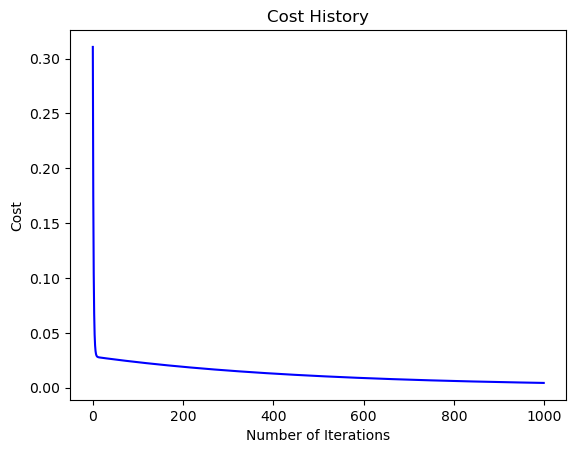

In [27]:
# Plot the cost history
plt.plot(range(num_iterations), cost_history, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()


In [28]:
def compute_cost_with_regularization(x, y, m, b, lambda_):
    """
    Compute the cost with L2 regularization.
    
    Parameters:
    x (array-like): Feature data
    y (array-like): Target data
    m (float): Slope
    b (float): Intercept
    lambda_ (float): Regularization parameter
    
    Returns:
    float: Regularized cost
    """
    n = len(y)
    y_pred = m * x + b
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    regularization_term = (lambda_ / (2 * n)) * np.sum(m ** 2)
    return cost + regularization_term

In [29]:
def gradient_descent_with_regularization(x, y, m, b, learning_rate, num_iterations, lambda_):
    """
    Perform gradient descent to learn m and b with L2 regularization.
    
    Parameters:
    x (array-like): Feature data
    y (array-like): Target data
    m (float): Initial slope
    b (float): Initial intercept
    learning_rate (float): Learning rate
    num_iterations (int): Number of iterations
    lambda_ (float): Regularization parameter
    
    Returns:
    tuple: (final_m, final_b, cost_history) where
           final_m (float): Learned slope
           final_b (float): Learned intercept
           cost_history (list): List of cost values over iterations
    """
    n = len(y)
    cost_history = []

    for _ in range(num_iterations):
        # Predictions
        y_pred = m * x + b
        
        # Compute gradients with L2 regularization
        dm = (1 / n) * np.sum((y_pred - y) * x) + (lambda_ * m)
        db = (1 / n) * np.sum(y_pred - y)
        
        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db
        
        # Calculate cost and save it to history
        cost = compute_cost_with_regularization(x, y, m, b, lambda_)
        cost_history.append(cost)
    
    return m, b, cost_history

In [30]:
# Initialize parameters
m = 0  # Initial slope
b = 0  # Initial intercept
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations
lambda_ = 0.1  # Regularization parameter

# Perform gradient descent with regularization
m_learned, b_learned, cost_history = gradient_descent_with_regularization(x, y, m, b, learning_rate, num_iterations, lambda_)

print(f"Learned slope (m): {m_learned}")
print(f"Learned intercept (b): {b_learned}")
print(f"Final cost (Mean Squared Error with Regularization): {cost_history[-1]}")


Learned slope (m): 0.10667383042138744
Learned intercept (b): 0.5128645491259123
Final cost (Mean Squared Error with Regularization): 0.00403008900517287


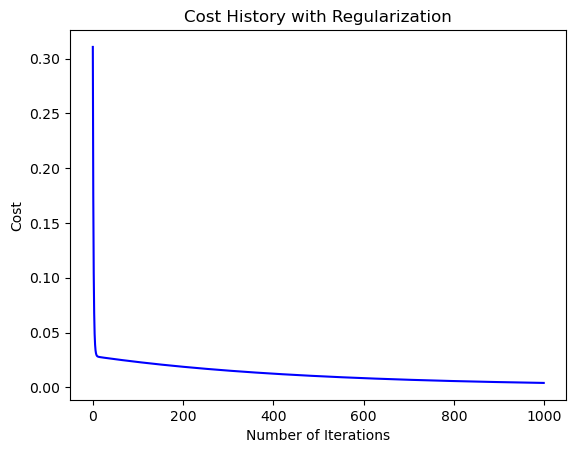

In [31]:
# Plot the cost history
plt.plot(range(num_iterations), cost_history, color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost History with Regularization')
plt.show()
